# Voos nos aeroportos brasileiros - Análise Exploratória dos dados

In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
#lendo arquivo csv e importando o dataframe para análise

file = '/Users/Lucas/Documents/Lucas/jornadaDS/projetos/datasets/voosbrasil/brflights.csv'
df = pd.read_csv(file, sep = ',', header = 0, encoding = 'unicode_escape')

#### A partir  do dataset, as seguintes análises serão realizadas:

1. Aeroporto com mais partidas;
2. Estado com mais partidas;
3. Destino brasileiro mais visitado;
4. Destino Internacional mais visitados por voos saídos do Brasil;
5. Período de maior partidas;
6. Período de maior número de voos internacionais;
7. Viagens as regiões do Brasil (da perspectiva de cada região);
8. Cia aérea mais operante;
9. Cia aérea mais pontual;
10. Cia aérea com mais atrasos;
11. De que origem internacional recebemos mais voos;
12. Rotas mais comuns;

In [3]:
df.shape

(2542519, 21)

In [4]:
df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
3,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473


In [5]:
df.tail()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
2542514,UAL - 129,UNITED AIRLINES,Internacional,2015-12-14T01:25:00Z,2015-12-14T04:31:00Z,2015-12-14T11:19:00Z,2015-12-14T14:18:00Z,Realizado,ATRASOS NAO ESPECIFICOS - OUTROS,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542515,UAL - 129,UNITED AIRLINES,Internacional,2015-12-01T01:25:00Z,2015-12-01T01:25:00Z,2015-12-01T11:19:00Z,2015-12-01T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542516,UAL - 129,UNITED AIRLINES,Internacional,2015-12-27T01:25:00Z,2015-12-27T01:25:00Z,2015-12-27T11:19:00Z,2015-12-27T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542517,UAL - 129,UNITED AIRLINES,Internacional,2015-12-05T01:25:00Z,2015-12-05T01:21:00Z,2015-12-05T11:19:00Z,2015-12-05T10:48:00Z,Realizado,ATRASOS NAO ESPECIFICOS - OUTROS,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542518,UAL - 129,UNITED AIRLINES,Internacional,2015-12-09T01:25:00Z,2015-12-09T01:25:00Z,2015-12-09T11:19:00Z,2015-12-09T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022


In [6]:
df.sample(5)

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
347029,AZU - 6947,AZUL,Nacional,2016-05-21T07:00:00Z,2016-05-21T06:48:00Z,2016-05-21T07:55:00Z,2016-05-21T07:40:00Z,Realizado,ANTECIPACAO DE HORARIO AUTORIZADA,Mario Ribeiro,...,MG,Brasil,Tancredo Neves,Confins,MG,Brasil,-43.965396,-19.634099,-43.820087,-16.704617
1040135,GLO - 1165,GOL,Nacional,2017-02-21T13:25:00Z,2017-02-21T13:25:00Z,2017-02-21T14:35:00Z,2017-02-21T14:35:00Z,Realizado,NaN,Governador Jose Richa,...,PR,Brasil,Congonhas,Sao Paulo,SP,Brasil,-46.656584,-23.627325,-51.133160,-23.332071
1767052,TAM - 3832,TAM,Nacional,2015-04-26T22:38:00Z,2015-04-26T22:38:00Z,2015-04-27T02:50:00Z,2015-04-27T02:50:00Z,Realizado,NaN,Aeroporto Internacional Do Rio De Janeiro/Galeao,...,RJ,Brasil,Eduardo Gomes,Manaus,AM,Brasil,-60.046325,-3.035847,-43.249423,-22.813410
1434557,PTB - 2268,PASSAREDO,Regional,2017-07-06T19:20:00Z,2017-07-06T20:31:00Z,2017-07-06T20:30:00Z,2017-07-06T21:33:00Z,Realizado,CONEXAO DE AERONAVE,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Leite Lopes,Ribeirao Preto,SP,Brasil,-47.775167,-21.134751,-46.478126,-23.434553
707867,GLO - 6623,GOL,Nacional,2016-09-20T21:30:00Z,2016-09-20T21:30:00Z,2016-09-20T23:13:00Z,2016-09-20T23:13:00Z,Realizado,NaN,Presidente Juscelino Kubitschek,...,DF,Brasil,Campo Grande,Campo Grande,MS,Brasil,-54.674123,-20.468694,-47.917235,-15.869737


In [7]:
df.isnull().sum()

Voos                          0
Companhia.Aerea               0
Codigo.Tipo.Linha             0
Partida.Prevista              0
Partida.Real             289196
Chegada.Prevista              0
Chegada.Real             289196
Situacao.Voo                  0
Codigo.Justificativa    1510212
Aeroporto.Origem              0
Cidade.Origem                 0
Estado.Origem                 0
Pais.Origem                   0
Aeroporto.Destino             0
Cidade.Destino                0
Estado.Destino                0
Pais.Destino                  0
LongDest                      0
LatDest                       0
LongOrig                      0
LatOrig                       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542519 entries, 0 to 2542518
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Voos                  object 
 1   Companhia.Aerea       object 
 2   Codigo.Tipo.Linha     object 
 3   Partida.Prevista      object 
 4   Partida.Real          object 
 5   Chegada.Prevista      object 
 6   Chegada.Real          object 
 7   Situacao.Voo          object 
 8   Codigo.Justificativa  object 
 9   Aeroporto.Origem      object 
 10  Cidade.Origem         object 
 11  Estado.Origem         object 
 12  Pais.Origem           object 
 13  Aeroporto.Destino     object 
 14  Cidade.Destino        object 
 15  Estado.Destino        object 
 16  Pais.Destino          object 
 17  LongDest              float64
 18  LatDest               float64
 19  LongOrig              float64
 20  LatOrig               float64
dtypes: float64(4), object(17)
memory usage: 407.4+ MB


#### Observações sobre o dataset:

- Mesma quantidade de missing values para as colunas de Partida.Real e Chegada.Real;
- Verificar a elevada quantidade de missing values para a coluna Codigo.Justificativa;
- As colunas LongDest, LatDest, LongOrig e LatOrig podem ser excluídas sem nenhum prejuízo pois, não serão utilizadas para análise;

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Investigando os Missing Values

Temos 289196 missing values na coluna Partida.Real, 289196 missing values na coluna Chegada.Real e 1510212 missing values na coluna Codigo.Justificativa.

#### - Começarei investigando os MVs das colunas Partida.Real e Chegada.Real

In [9]:
#nomeei de inv_na um novo dataframe para os dados que possuam os valores nulos para as colunas Partida.Real e Chegada.Real.

inv_na_df = df[df['Partida.Real'].isnull() & df['Chegada.Real'].isnull()]

In [10]:
inv_na_df.shape

(289196, 21)

In [11]:
inv_na_df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
111,AAL - 213,AMERICAN AIRLINES INC,Internacional,2016-01-18T00:29:00Z,NaN,2016-01-18T07:56:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Miami,...,N/I,Estados Unidos,Presidente Juscelino Kubitschek,Brasilia,DF,Brasil,-47.917235,-15.869737,-80.287046,25.795865
115,AAL - 213,AMERICAN AIRLINES INC,Internacional,2016-01-17T00:29:00Z,NaN,2016-01-17T07:56:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Miami,...,N/I,Estados Unidos,Presidente Juscelino Kubitschek,Brasilia,DF,Brasil,-47.917235,-15.869737,-80.287046,25.795865
149,AAL - 214,AMERICAN AIRLINES INC,Internacional,2016-01-15T23:59:00Z,NaN,2016-01-16T07:46:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Presidente Juscelino Kubitschek,...,DF,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-47.917235,-15.869737
158,AAL - 229,AMERICAN AIRLINES INC,Internacional,2016-01-21T00:34:00Z,NaN,2016-01-21T08:44:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Miami,...,N/I,Estados Unidos,Deputado Luis Eduardo Magalhaes,Salvador,BA,Brasil,-38.331241,-12.911098,-80.287046,25.795865
162,AAL - 229,AMERICAN AIRLINES INC,Internacional,2016-01-05T00:34:00Z,NaN,2016-01-05T08:44:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Miami,...,N/I,Estados Unidos,Deputado Luis Eduardo Magalhaes,Salvador,BA,Brasil,-38.331241,-12.911098,-80.287046,25.795865


In [12]:
inv_na_df.tail()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
2541976,TAM - 8113,TAM,Internacional,2015-11-28T20:45:00Z,NaN,2015-11-29T06:25:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Mexico,...,N/I,Mexico,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,-46.478126,-23.434553,-99.071908,19.436076
2541979,TAM - 8113,TAM,Internacional,2015-11-10T20:45:00Z,NaN,2015-11-11T06:25:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Mexico,...,N/I,Mexico,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,-46.478126,-23.434553,-99.071908,19.436076
2541981,TAM - 8113,TAM,Internacional,2015-11-27T20:45:00Z,NaN,2015-11-28T06:25:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Mexico,...,N/I,Mexico,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,-46.478126,-23.434553,-99.071908,19.436076
2541993,TAM - 8113,TAM,Internacional,2015-11-19T20:45:00Z,NaN,2015-11-20T06:25:00Z,NaN,Cancelado,CANCELAMENTO POR MOTIVOS TECNICOS - OPERACIONAIS,Mexico,...,N/I,Mexico,Guarulhos - Governador Andre Franco Montoro,Guarulhos,SP,Brasil,-46.478126,-23.434553,-99.071908,19.436076
2542352,TAM - 8112,TAM,Internacional,2015-12-26T23:25:00Z,NaN,2015-12-27T09:15:00Z,NaN,Cancelado,CANCELAMENTO - AEROPORTO ORIGEM ABAIXO LIMITES,Guarulhos - Governador Andre Franco Montoro,...,SP,Brasil,Mexico,Mexico,N/I,Mexico,-99.071908,19.436076,-46.478126,-23.434553


In [13]:
pd.value_counts(inv_na_df['Situacao.Voo'])

Cancelado    289196
Name: Situacao.Voo, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

Até aqui, percebe-se que os valores nulos para as colunas Partida.Real e Chegada.Real são referentes a voos cancelados. Dessa forma, não houve embarque e, nem muito menos, decolagem desses voos. Por essa razão possuem valores vazios.

-------------------------------------------------------------------------------------------------------------------------------

#### - Investigando agora, os MVs da coluna Codigo.Justificativa

In [14]:
#nomeei de cjna_df o novo dataframe no qual os dados para a coluna Codigo.Justificativa são não nulos.

cjna_df = df[df['Codigo.Justificativa'].isnull()]

In [15]:
cjna_df.shape

(1510212, 21)

In [16]:
cjna_df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
5,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-03T23:05:00Z,2016-01-03T23:05:00Z,2016-01-04T07:50:00Z,2016-01-04T07:50:00Z,Realizado,NaN,Miami,...,N/I,Estados Unidos,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,-49.172481,-25.532713,-80.287046,25.795865


In [17]:
cjna_df.tail()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
2542509,UAL - 129,UNITED AIRLINES,Internacional,2015-12-15T01:25:00Z,2015-12-15T01:25:00Z,2015-12-15T11:19:00Z,2015-12-15T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542512,UAL - 129,UNITED AIRLINES,Internacional,2015-12-30T01:25:00Z,2015-12-30T01:25:00Z,2015-12-30T11:19:00Z,2015-12-30T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542515,UAL - 129,UNITED AIRLINES,Internacional,2015-12-01T01:25:00Z,2015-12-01T01:25:00Z,2015-12-01T11:19:00Z,2015-12-01T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542516,UAL - 129,UNITED AIRLINES,Internacional,2015-12-27T01:25:00Z,2015-12-27T01:25:00Z,2015-12-27T11:19:00Z,2015-12-27T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022
2542518,UAL - 129,UNITED AIRLINES,Internacional,2015-12-09T01:25:00Z,2015-12-09T01:25:00Z,2015-12-09T11:19:00Z,2015-12-09T11:19:00Z,Realizado,NaN,Houston,...,N/I,Estados Unidos,Aeroporto Internacional Do Rio De Janeiro/Galeao,Rio De Janeiro,RJ,Brasil,-43.249423,-22.81341,-95.336783,29.99022


In [18]:
pd.value_counts(cjna_df['Situacao.Voo'])

Realizado    1510212
Name: Situacao.Voo, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

Observa-se que no dataframe cjna_df possui dados apenas dos voos que foram realizados e que na coluna Codigo.Justificativa possuem valores nulos.

-------------------------------------------------------------------------------------------------------------------------------

In [19]:
#nomeei de ontime_cjna_df o dataframe que possui dados nos quais possuem valores nulos para a coluna Codigo.Justificativa 
#e os valores para as colunas Partida.Prevista e Partida.Real são iguais.

ontime_cjna_df = cjna_df[cjna_df['Partida.Prevista'] == cjna_df['Partida.Real']]

In [20]:
ontime_cjna_df.head()

,Voos,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,...,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,LongDest,LatDest,LongOrig,LatOrig
0,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,...,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil,-51.175381,-29.993473,-49.172481,-25.532713
1,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
2,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
4,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,...,RS,Brasil,Miami,Miami,N/I,Estados Unidos,-80.287046,25.795865,-51.175381,-29.993473
5,AAL - 203,AMERICAN AIRLINES INC,Internacional,2016-01-03T23:05:00Z,2016-01-03T23:05:00Z,2016-01-04T07:50:00Z,2016-01-04T07:50:00Z,Realizado,NaN,Miami,...,N/I,Estados Unidos,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,-49.172481,-25.532713,-80.287046,25.795865


In [21]:
ontime_cjna_df.shape

(1489678, 21)

-------------------------------------------------------------------------------------------------------------------------------

Aqui concluiu-se que dos 1510212 voos realizados e que possuem valores nulos para a coluna Codigo.Justificativa, 1489678 saíram no horário previsto. Já 20534 voos foram realizados com algum atraso ou adiantamento, porém não foi justificado.

-------------------------------------------------------------------------------------------------------------------------------

#### - Conclusões estudo dos Missing Values

- Os missing values para colunas Partida.Real e Chegada.Real foram de voos cancelados.
- Dos 1510212 missing values da coluna Codigo.Justificativa, 1489678 foram de voos que saíram no horário previsto.
- Enquanto 20534 foram de voos que saíram atrasados ou adiantados porém sem justificativa.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Excluindo colunas que não serão utilizadas nas análises

##### Estarão sendo excluídas as seguintes colunas:
- Voos;
- LongDest; 
- LatDest;
- LongOrig;
- LatOrig 

In [22]:
df.drop(['Voos', 'LongDest', 'LongOrig', 'LatDest', 'LatOrig'], axis = 1, inplace = True)

In [23]:
df.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino
0,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil
1,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
2,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
3,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
4,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos


#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizações Gráficas

#### 1. Aeroporto com mais partidas

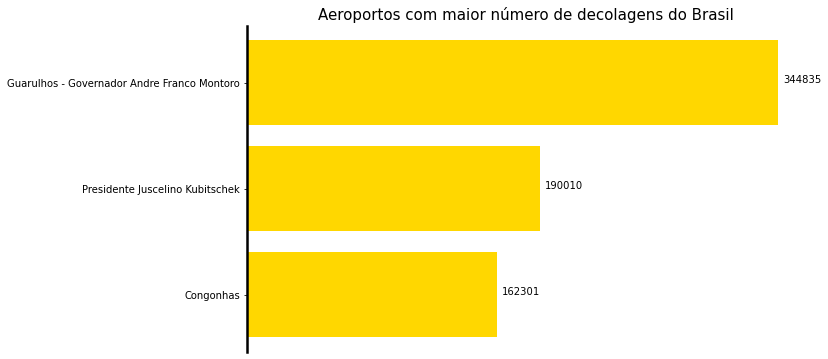

In [24]:
#definindo eixo x e transformando em lista
aeroportos = df['Aeroporto.Origem'].value_counts().head(3).values
aeroportos = aeroportos.tolist()
aeroportos.reverse()

#definindo eixo y e transformando em lista
ind = df['Aeroporto.Origem'].value_counts().head(3).index
ind = ind.tolist()
ind.reverse()

#criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize = (10, 6))
plt.barh(ind, aeroportos, color = "gold")

#posicionamento dos valores para cada barra do gráfico
for i in range(3):
    ax.text(x = aeroportos[i] + 3000, y = ind[i], s = str(aeroportos[i]), fontsize = 10)
    
plt.title("Aeroportos com maior número de decolagens do Brasil", fontsize = 15)

#destacando a borda do eixo y do gráfico
ax.spines['left'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'right', 'bottom']:
    ax.spines[axis].set_color(None)
ax.tick_params(axis = 'x', labelbottom = False, bottom = None)

plt.show()

In [25]:
df['Aeroporto.Origem'].value_counts().head(3)

Guarulhos - Governador Andre Franco Montoro    344835
Presidente Juscelino Kubitschek                190010
Congonhas                                      162301
Name: Aeroporto.Origem, dtype: int64

In [26]:
graf = df.groupby(['Aeroporto.Origem'])

In [27]:
guarulhos = graf['Codigo.Tipo.Linha'].value_counts().loc['Guarulhos - Governador Andre Franco Montoro']

In [28]:
#atribuindo as seguintes variáveis os valores do número de voos narionais, regionais e internacionais, respectivamente, do aeroporto de Guarulhos
guar_nac = guarulhos[0]
guar_reg = guarulhos[2]
guar_int = guarulhos[1]

In [29]:
jk = graf['Codigo.Tipo.Linha'].value_counts().loc['Presidente Juscelino Kubitschek']

In [30]:
#atribuindo as seguintes variáveis os valores do número de voos narionais, regionais e internacionais, respectivamente, do aeroporto JK
jk_nac = jk[0]
jk_reg = jk[1]
jk_int = jk[2]

In [31]:
congonhas = graf['Codigo.Tipo.Linha'].value_counts().loc['Congonhas']

In [32]:
#atribuindo as seguintes variáveis os valores do número de voos narionais, regionais e internacionais, respectivamente, do aeroporto de Congonhas
cong_nac = congonhas[0]
cong_reg = congonhas[1]
cong_int = 0

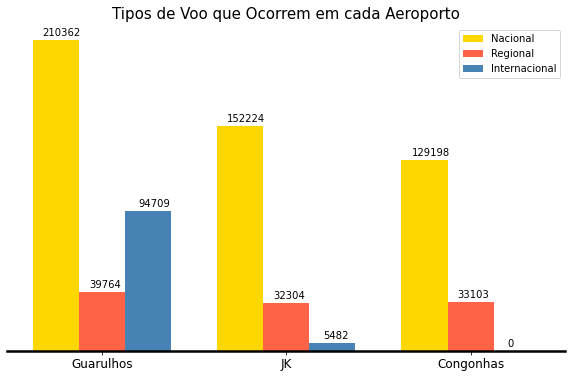

In [33]:
group = 3
labels = ['Guarulhos', 'JK', 'Congonhas']

#definindo eixo y
nacional = [guar_nac, jk_nac, cong_nac] 
regional = [guar_reg, jk_reg, cong_reg]
internacional = [guar_int, jk_int, cong_int] 

#definindo eixo x
ind = np.arange(group)

width = 0.25

#criando o gráfico de barras verticais
fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(ind - width, nacional, width = width, color = 'gold', label = 'Nacional')
plt.bar(ind, regional, width = width, color = 'tomato', label = 'Regional')
plt.bar(ind + width, internacional, width = width, color = 'steelblue', label = 'Internacional')

plt.xticks(ticks = ind, labels = labels, fontsize = 12)
plt.title('Tipos de Voo que Ocorrem em cada Aeroporto', fontsize = 15)

#destacando a borda do eixo x do gráfico
ax.spines['bottom'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.tick_params(axis = 'y', labelleft = False, left = None)
    
    
altura_nac = nacional
altura_reg = regional
altura_int = internacional
posicao = ind
for i in range(3):
    ax.text(x = posicao[i] - 0.32, y = altura_nac[i] + 3000, s = str(altura_nac[i]), fontsize = 10)
    ax.text(x = posicao[i] - 0.07, y = altura_reg[i] + 3000, s = str(altura_reg[i]), fontsize = 10)
    ax.text(x = posicao[i] + 0.2, y = altura_int[i] + 3000, s = str(altura_int[i]), fontsize = 10)

plt.legend() 

plt.show()

#### 2. Estado com maior número de partidas

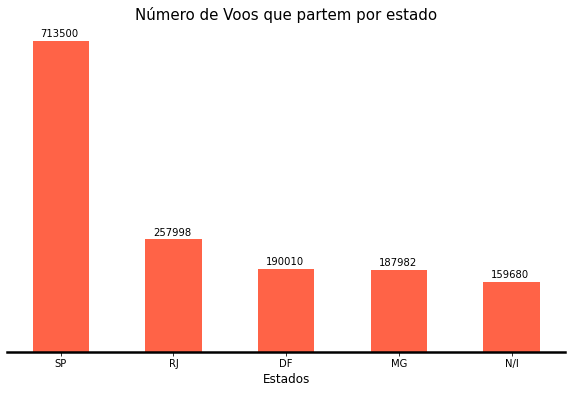

In [34]:
#definindo eixo y
estado = df['Estado.Origem'].value_counts().head().values

#definindo eixo x
ind = df['Estado.Origem'].value_counts().head().index

index = np.arange(len(ind))
width = 0.5

#criando o gráfico de barras verticais
fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(ind, estado, width=width, color = 'tomato')

#atribuindo nome ao eixo x e o título do gráfico
plt.title('Número de Voos que partem por estado', fontsize = 15)
plt.xlabel('Estados', fontsize = 12)

#destacando a borda do eixo x do gráfico
ax.spines['bottom'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.tick_params(axis = 'y', labelleft = False, left = None)

#posicionamento dos valores para cada barra do gráfico
for i in range(5):
    ax.text(x = index[i] - 0.18, y = estado[i] + 10000, s = str(estado[i]), fontsize = 10)
    
plt.show()

OBS: Nesse gráfico, o N/I representa os destinos internacionais, ou seja, todos os voos que partem de um destino internacional para o Brasil.

#### 3. Destino brasileiro mais visitado

In [35]:
#definindo uma função para substituir as cidades onde os aeroportos estão situados para as cidades maiores da região aos quais pertencem

def alterar_cidade(cidade):
    if cidade == 'Guarulhos':
        return 'Sao Paulo'
    elif cidade == 'Confins':
        return 'Belo Horizonte'
    elif cidade == 'Sao Jose Dos Pinhais':
        return 'Curitiba'
    return cidade

In [36]:
#aplicando a função 'alterar_cidade' na coluna 'Cidade.Destino'

df['Cidade.Destino'] = df['Cidade.Destino'].map(alterar_cidade)

In [37]:
df['Cidade.Destino'].value_counts().head(10)

Sao Paulo         501590
Rio De Janeiro    257128
Brasilia          190469
Campinas          154665
Belo Horizonte    148139
Salvador           89161
Porto Alegre       89070
Curitiba           85839
Recife             78928
Fortaleza          60302
Name: Cidade.Destino, dtype: int64

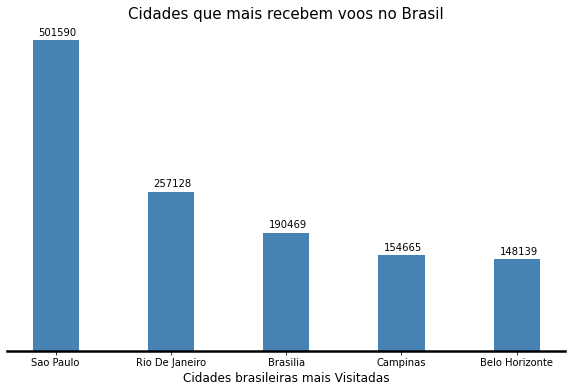

In [38]:
#definindo eixo y
cidade = df['Cidade.Destino'].value_counts().head().values

#definindo eixo x
ind = df['Cidade.Destino'].value_counts().head().index

index = np.arange(len(ind))
width = 0.4

#criando o gráfico de barras verticais
fig, ax = plt.subplots(figsize = (10, 6))
plt.bar(ind, cidade, width=width, color = 'steelblue')

#atribuindo nome ao eixo x e o título do gráfico
plt.xlabel('Cidades brasileiras mais Visitadas', fontsize = 12)
plt.title('Cidades que mais recebem voos no Brasil', fontsize = 15)

#destacando a borda do eixo x do gráfico
ax.spines['bottom'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.tick_params(axis = 'y', labelleft = False, left = None)

#posicionamento dos valores para cada barra do gráfico
for i in range(5):
    ax.text(x = index[i] - 0.15, y = cidade[i] + 8000, s = str(cidade[i]), fontsize = 10)

plt.show()

#### 4. Destino Internacional mais visitados por brasileiros

In [39]:
#criando um dataframe para os voos cujos registros foram 'Internacional'

internacional_df = df[df['Codigo.Tipo.Linha'] == 'Internacional']

In [40]:
internacional_df.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino
0,AMERICAN AIRLINES INC,Internacional,2016-01-30T08:58:00Z,2016-01-30T08:58:00Z,2016-01-30T10:35:00Z,2016-01-30T10:35:00Z,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,PR,Brasil,Salgado Filho,Porto Alegre,RS,Brasil
1,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
2,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
3,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
4,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos


In [41]:
#criando um dataframe de voos com registro 'Internacional' e que os campos da coluna 'Estado.Destino' foram 'N/I'(SELECIONANDO APENAS OS VOOS QUE PARTIRAM DO BRASIL COM DESTINOS INTERNACIONAIS)

saida_inter_df = internacional_df[internacional_df['Estado.Destino'] == 'N/I']

In [42]:
saida_inter_df.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,Estado.Origem,Pais.Origem,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino
1,AMERICAN AIRLINES INC,Internacional,2016-01-13T12:13:00Z,2016-01-13T12:13:00Z,2016-01-13T21:30:00Z,2016-01-13T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
2,AMERICAN AIRLINES INC,Internacional,2016-01-29T12:13:00Z,2016-01-29T12:13:00Z,2016-01-29T21:30:00Z,2016-01-29T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
3,AMERICAN AIRLINES INC,Internacional,2016-01-19T12:13:00Z,2016-01-18T12:03:00Z,2016-01-19T21:30:00Z,2016-01-18T20:41:00Z,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
4,AMERICAN AIRLINES INC,Internacional,2016-01-30T12:13:00Z,2016-01-30T12:13:00Z,2016-01-30T21:30:00Z,2016-01-30T21:30:00Z,Realizado,NaN,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos
7,AMERICAN AIRLINES INC,Internacional,2016-01-18T12:13:00Z,2016-01-18T13:09:00Z,2016-01-18T21:30:00Z,2016-01-18T22:24:00Z,Realizado,CONEXAO DE AERONAVE,Salgado Filho,Porto Alegre,RS,Brasil,Miami,Miami,N/I,Estados Unidos


In [43]:
saida_inter_df['Cidade.Destino'].value_counts().head(10)

Buenos Aires               16827
Buenos Aires/Aeroparque    15398
Santiago Do Chile          12069
Miami                      11805
Panama                     10518
Lisboa                      9076
Lima                        6390
Montevideu                  6312
New York                    5087
Madrid                      4588
Name: Cidade.Destino, dtype: int64

In [44]:
#definindo uma função para substituir o nome 'Buenos Aires/Aeroparque' para apenas 'Buenos Aires'

def alter_cidade_inter(cidade):
    if cidade == 'Buenos Aires/Aeroparque':
        return 'Buenos Aires'
    return cidade

In [45]:
#aplicando a função 'alter_cidade_inter' na coluna 'Cidade.Destino'

saida_inter_df['Cidade.Destino'] = saida_inter_df['Cidade.Destino'].map(alter_cidade_inter)

C:\Users\Lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
saida_inter_df['Cidade.Destino'].value_counts().head(10)

Buenos Aires         32225
Santiago Do Chile    12069
Miami                11805
Panama               10518
Lisboa                9076
Lima                  6390
Montevideu            6312
New York              5087
Madrid                4588
Paris                 4353
Name: Cidade.Destino, dtype: int64

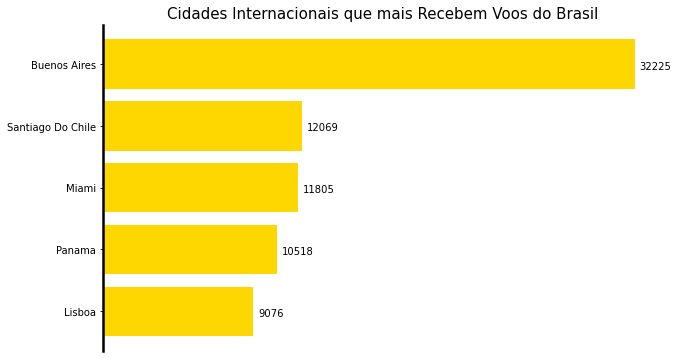

In [47]:
#definindo eixo x e transformando em lista
cidade_inter = saida_inter_df['Cidade.Destino'].value_counts().head().values
cidade_inter = cidade_inter.tolist()
cidade_inter.reverse()

#definindo eixo y e transformando em lista
ind = saida_inter_df['Cidade.Destino'].value_counts().head().index
ind = ind.tolist()
ind.reverse()

index = np.arange(len(cidade_inter))

#criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize = (10, 6))
plt.barh(ind, cidade_inter, color = 'gold')

plt.title('Cidades Internacionais que mais Recebem Voos do Brasil', fontsize = 15)

#destacando a borda do eixo y do gráfico
ax.spines['left'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'bottom', 'right']:
    ax.spines[axis].set_color(None)
ax.tick_params(axis = 'x', labelbottom = False, bottom = None)

#posicionamento dos valores para cada barra do gráfico
for i in range(5):
    ax.text(x = cidade_inter[i] + 300, y = index[i] - 0.08, s = str(cidade_inter[i]), fontsize = 10)

plt.show()

In [48]:
saida_inter_df['Pais.Destino'].value_counts().head(10)

Argentina         35893
Estados Unidos    31482
Chile             12069
Panama            10518
Portugal           9655
Uruguai            6530
Peru               6390
Espanha            5402
Franca             4353
Colombia           4139
Name: Pais.Destino, dtype: int64

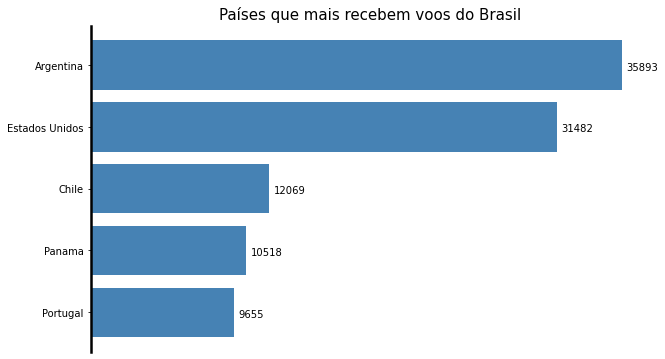

In [49]:
#definindo eixo x e transformando em lista
pais_destino_inter = saida_inter_df['Pais.Destino'].value_counts().head().values
pais_destino_inter = pais_destino_inter.tolist()
pais_destino_inter.reverse()

#definindo eixo y e transformando em lista
ind = saida_inter_df['Pais.Destino'].value_counts().head().index
ind = ind.tolist()
ind.reverse()

index = np.arange(len(pais_destino_inter))

#criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize = (10, 6))
plt.barh(ind, pais_destino_inter, color = 'steelblue')

plt.title('Países que mais recebem voos do Brasil', fontsize = 15)

#destacando a borda do eixo y do gráfico
ax.spines['left'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'right', 'bottom']:
    ax.spines[axis].set_color(None)
ax.tick_params(axis = 'x', labelbottom = False, bottom = None)

#posicionamento dos valores para cada barra do gráfico
for i in range(5):
    ax.text(x = pais_destino_inter[i] + 300, y = index[i] - 0.08, s = str(pais_destino_inter[i]), fontsize = 10)
    
plt.show()

#### 5. Período de maior partidas

In [50]:
#covertendo as strings das colunas de data e horário em tipos datetime
df['Partida.Prevista'] = pd.to_datetime(df['Partida.Prevista']).dt.tz_localize(None)
df['Partida.Real'] = pd.to_datetime(df['Partida.Real']).dt.tz_localize(None)
df['Chegada.Prevista'] = pd.to_datetime(df['Chegada.Prevista']).dt.tz_localize(None)
df['Chegada.Real'] = pd.to_datetime(df['Chegada.Real']).dt.tz_localize(None)

#criando colunas de data
df['Data.Partida.Real'] = pd.to_datetime(df['Partida.Real']).dt.date
df['Data.Chegada.Real'] = pd.to_datetime(df['Chegada.Real']).dt.date

#criando colunas para mês e outra para ano
df['Mes.Partida'] = pd.to_datetime(df['Data.Partida.Real']).dt.month
df['Ano.Partida'] = pd.to_datetime(df['Data.Partida.Real']).dt.year

In [51]:
#definindo uma função para nomear os meses do ano

def nome_mes(mes):
    if mes == 1:
        return "Janeiro"
    elif mes == 2:
        return "Fevereiro"
    elif mes == 3:
        return "Março"
    elif mes == 4:
        return "Abril"
    elif mes == 5:
        return "Maio"
    elif mes == 6:
        return "Junho"
    elif mes == 7:
        return "Julho"
    elif mes == 8:
        return "Agosto"
    elif mes == 9:
        return "Setembro"
    elif mes == 10:
        return "Outubro"
    elif mes == 11:
        return "Novembro"
    elif mes == 12:
        return "Dezembro"
    return mes

In [52]:
#preenchendo os campos nulo (NaN) da coluna 'Mes.Partida' com o valor 0 (os campos com valor 0, representa voos que foram cancelados)
#definindo os dados da colona 'Mes.Partida' como do tipo inteiro
#aplicando a função nome_mes na coluna 'Mes.Partida'

df['Mes.Partida'] = df['Mes.Partida'].fillna(0)
df['Mes.Partida'] = df['Mes.Partida'].astype(int)
df['Mes.Partida'] = df['Mes.Partida'].map(nome_mes)

In [53]:
#preenchendo os campos nulo (NaN) da coluna 'Ano.Partida' com o valor 0 (os campos com valor 0, representa voos que foram cancelados)
#definindo os dados da colona 'Ano.Partida' como do tipo inteiro

df['Ano.Partida'] = df['Ano.Partida'].fillna(0)
df['Ano.Partida'] = df['Ano.Partida'].astype(int)

In [54]:
df.dtypes

Companhia.Aerea                 object
Codigo.Tipo.Linha               object
Partida.Prevista        datetime64[ns]
Partida.Real            datetime64[ns]
Chegada.Prevista        datetime64[ns]
Chegada.Real            datetime64[ns]
Situacao.Voo                    object
Codigo.Justificativa            object
Aeroporto.Origem                object
Cidade.Origem                   object
Estado.Origem                   object
Pais.Origem                     object
Aeroporto.Destino               object
Cidade.Destino                  object
Estado.Destino                  object
Pais.Destino                    object
Data.Partida.Real               object
Data.Chegada.Real               object
Mes.Partida                     object
Ano.Partida                      int32
dtype: object

In [55]:
df['Mes.Partida'].value_counts()

0            289196
Janeiro      233409
Março        221707
Julho        220663
Maio         215487
Fevereiro    207676
Junho        207652
Abril        207515
Dezembro     151962
Agosto       148792
Outubro      148512
Setembro     145213
Novembro     144735
Name: Mes.Partida, dtype: int64

In [56]:
#criando um dataframe apenas com os registros dos voos que realmente ocorreram (selecionando os registros diferentes de 0 para a coluna 'Mes.Partida')

voos_realizados_df = df[df['Mes.Partida'] != 0]

In [57]:
voos_realizados_df.isnull().sum()

Companhia.Aerea               0
Codigo.Tipo.Linha             0
Partida.Prevista              0
Partida.Real                  0
Chegada.Prevista              0
Chegada.Real                  0
Situacao.Voo                  0
Codigo.Justificativa    1510212
Aeroporto.Origem              0
Cidade.Origem                 0
Estado.Origem                 0
Pais.Origem                   0
Aeroporto.Destino             0
Cidade.Destino                0
Estado.Destino                0
Pais.Destino                  0
Data.Partida.Real             0
Data.Chegada.Real             0
Mes.Partida                   0
Ano.Partida                   0
dtype: int64

In [58]:
voos_realizados_df['Ano.Partida'].value_counts()

2015    941607
2016    834426
2017    477286
2014         4
Name: Ano.Partida, dtype: int64

In [59]:
#criando dataframes para cada ano com registro no dataset

voos_realizados_2014_df = voos_realizados_df[voos_realizados_df['Ano.Partida'] == 2014]
voos_realizados_2015_df = voos_realizados_df[voos_realizados_df['Ano.Partida'] == 2015]
voos_realizados_2016_df = voos_realizados_df[voos_realizados_df['Ano.Partida'] == 2016]
voos_realizados_2017_df = voos_realizados_df[voos_realizados_df['Ano.Partida'] == 2017]

In [60]:
#O ano de 2014 possui apenas 4 registros, então resolvi excluir para esta análise

voos_realizados_df = voos_realizados_df.drop(voos_realizados_2014_df.index)

In [61]:
#O ano de 2017 não possui registros de todo o ano (apenas de parte dele).Por esse motivo, também o excluí desta análise

voos_realizados_df = voos_realizados_df.drop(voos_realizados_2017_df.index)

In [62]:
voos_realizados_df['Ano.Partida'].value_counts()

2015    941607
2016    834426
Name: Ano.Partida, dtype: int64

In [63]:
voos_realizados_df['Mes.Partida'].value_counts()[voos_realizados_df['Mes.Partida'].unique()].index

Index(['Janeiro', 'Fevereiro', 'Dezembro', 'Março', 'Abril', 'Maio', 'Junho',
       'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro'],
      dtype='object')

In [64]:
voos_realizados_2015_df['Mes.Partida'].value_counts()[voos_realizados_df['Mes.Partida'].unique()].values

array([83712, 74501, 80501, 80415, 75942, 77886, 75687, 81651, 79230,
       76499, 78769, 76814], dtype=int64)

In [65]:
voos_realizados_2016_df['Mes.Partida'].value_counts()[voos_realizados_df['Mes.Partida'].unique()].values

array([77219, 69560, 71457, 69245, 65967, 68551, 66564, 69948, 69537,
       68714, 69743, 67921], dtype=int64)

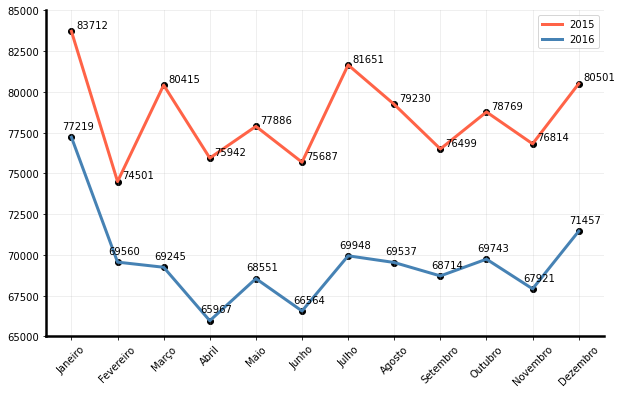

In [66]:
#Definindo os pontos do gráfico
#para o eixo x estão os meses do ano (Observe que o mês de Dezembro está fora de ordem)
x = voos_realizados_df['Mes.Partida'].value_counts()[voos_realizados_df['Mes.Partida'].unique()].index

#Colocando o mês de Dezembro na ordem cronológica do ano
x = x.tolist()
aux_mes = ''
aux_mes = x[2]
x.append(aux_mes)
del x[2]

#para o eixo y estão os valores do quantitativo de voos que partem dos aeroportos brasileiros para os meses do ano 2015(Observe que o mês de Dezembro está fora de ordem)
y_2015 = voos_realizados_2015_df['Mes.Partida'].value_counts()[voos_realizados_df['Mes.Partida'].unique()].values

#Colocando o valor do mês de Dezembro na ordem cronológica do ano
y_2015 = y_2015.tolist()
aux_2015 = ''
aux_2015 = y_2015[2]
y_2015.append(aux_2015)
del y_2015[2]

#para o eixo y estão os valores do quantitativo de voos que partem dos aeroportos brasileiros para os meses do ano 2016(Observe que o mês de Dezembro está fora de ordem)
y_2016 = voos_realizados_2016_df['Mes.Partida'].value_counts()[voos_realizados_df['Mes.Partida'].unique()].values

#Colocando os valores na ordem cronológica dos meses no ano(o mês de dezembro estava fora de ordem)
y_2016 = y_2016.tolist()
aux_2016 = ''
aux_2016 = y_2016[2]
y_2016.append(aux_2016)
del y_2016[2]

index = np.arange(len(x))

#criando o gráfico de linhas
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(x, y_2015, color = 'tomato', linewidth = 3, label = '2015')
plt.scatter(x, y_2015, color='black')
plt.plot(x, y_2016, color = 'steelblue', linewidth = 3, label = '2016')
plt.scatter(x, y_2016, color='black')

#posicionamento dos valores para cada ponto do gráfico
for i in range(12):
    ax.text(y = y_2015[i] + 200, x = index[i] + .1, s = str(y_2015[i]), fontsize = 10)
    ax.text(y = y_2016[i] + 500, x = index[i] - .2, s = str(y_2016[i]), fontsize = 10)

#escala do eixo y    
plt.ylim(ymax = 85000, ymin = 65000)

#destacando as bordas dos eixos do gráfico
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)

#eliminando as demais bordas do gráfico
for axis in ['top', 'right']:
    ax.spines[axis].set_color(None)

#rotacionando os nomes dos meses no eixo x
ax.tick_params(axis ='x', labelrotation = 45)

plt.legend()
plt.grid(alpha = 0.25)

plt.show()


In [67]:
#verificando o status em que o voo decolou (atrasado, pontual ou adiantado)

df['Dif.Tempo.Partida'] = (df['Partida.Real'] - df['Partida.Prevista'])
df['Dif.Tempo.Chegada'] = (df['Chegada.Real'] - df['Chegada.Prevista'])

In [68]:
df.head()

,Companhia.Aerea,Codigo.Tipo.Linha,Partida.Prevista,Partida.Real,Chegada.Prevista,Chegada.Real,Situacao.Voo,Codigo.Justificativa,Aeroporto.Origem,Cidade.Origem,...,Aeroporto.Destino,Cidade.Destino,Estado.Destino,Pais.Destino,Data.Partida.Real,Data.Chegada.Real,Mes.Partida,Ano.Partida,Dif.Tempo.Partida,Dif.Tempo.Chegada
0,AMERICAN AIRLINES INC,Internacional,2016-01-30 08:58:00,2016-01-30 08:58:00,2016-01-30 10:35:00,2016-01-30 10:35:00,Realizado,NaN,Afonso Pena,Sao Jose Dos Pinhais,...,Salgado Filho,Porto Alegre,RS,Brasil,2016-01-30,2016-01-30,Janeiro,2016,0 days 00:00:00,0 days 00:00:00
1,AMERICAN AIRLINES INC,Internacional,2016-01-13 12:13:00,2016-01-13 12:13:00,2016-01-13 21:30:00,2016-01-13 21:30:00,Realizado,NaN,Salgado Filho,Porto Alegre,...,Miami,Miami,N/I,Estados Unidos,2016-01-13,2016-01-13,Janeiro,2016,0 days 00:00:00,0 days 00:00:00
2,AMERICAN AIRLINES INC,Internacional,2016-01-29 12:13:00,2016-01-29 12:13:00,2016-01-29 21:30:00,2016-01-29 21:30:00,Realizado,NaN,Salgado Filho,Porto Alegre,...,Miami,Miami,N/I,Estados Unidos,2016-01-29,2016-01-29,Janeiro,2016,0 days 00:00:00,0 days 00:00:00
3,AMERICAN AIRLINES INC,Internacional,2016-01-19 12:13:00,2016-01-18 12:03:00,2016-01-19 21:30:00,2016-01-18 20:41:00,Realizado,LIBERACAO SERV. TRAFEGO AEREO/ANTECIPACAO,Salgado Filho,Porto Alegre,...,Miami,Miami,N/I,Estados Unidos,2016-01-18,2016-01-18,Janeiro,2016,-2 days +23:50:00,-2 days +23:11:00
4,AMERICAN AIRLINES INC,Internacional,2016-01-30 12:13:00,2016-01-30 12:13:00,2016-01-30 21:30:00,2016-01-30 21:30:00,Realizado,NaN,Salgado Filho,Porto Alegre,...,Miami,Miami,N/I,Estados Unidos,2016-01-30,2016-01-30,Janeiro,2016,0 days 00:00:00,0 days 00:00:00
